## Import library

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 100)

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("cement_slump.csv")

In [7]:
df

Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)  \
0     273.0   82.0    105.0  210.0   9.0         904.0       680.0       23.0   
1     163.0  149.0    191.0  180.0  12.0         843.0       746.0        0.0   
2     162.0  148.0    191.0  179.0  16.0         840.0       743.0        1.0   
3     162.0  148.0    190.0  179.0  19.0         838.0       741.0        3.0   
4     154.0  112.0    144.0  220.0  10.0         923.0       658.0       20.0   
..      ...    ...      ...    ...   ...           ...         ...        ...   
98    248.3  101.0    239.1  168.9   7.7         954.2       640.6        0.0   
99    248.0  101.0    239.9  169.1   7.7         949.9       644.1        2.0   
100   258.8   88.0    239.6  175.3   7.6         938.9       646.0        0.0   
101   297.1   40.9    239.9  194.0   7.5         908.9       651.8       27.5   
102   348.7    0.1    223.1  208.5   9.6         786.2       758.1       29.0   

     FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0        62.0                               34.99  
1        20.0                               41.14  
2        20.0                               41.81  
3        21.5                               42.08  
4        64.0                               26.82  
..        ...                                 ...  
98       20.0                               49.97  
99       20.0                               50.23  
100      20.0                               50.50  
101      67.0                               49.17  
102      78.0                               48.70  

[103 rows x 10 columns]

In [10]:
df.corr()

Cement      Slag   Fly ash     Water  \
Cement                              1.000000 -0.243553 -0.486535  0.221091   
Slag                               -0.243553  1.000000 -0.322619 -0.026775   
Fly ash                            -0.486535 -0.322619  1.000000 -0.241321   
Water                               0.221091 -0.026775 -0.241321  1.000000   
SP                                 -0.106387  0.306504 -0.143508 -0.155456   
Coarse Aggr.                       -0.309857 -0.223792  0.172620 -0.602201   
Fine Aggr.                          0.056959 -0.183522 -0.282854  0.114591   
SLUMP(cm)                           0.145913 -0.284037 -0.118621  0.466568   
FLOW(cm)                            0.186461 -0.327231 -0.055423  0.632026   
Compressive Strength (28-day)(Mpa)  0.445656 -0.331522  0.444380 -0.254320   

                                          SP  Coarse Aggr.  Fine Aggr.  \
Cement                             -0.106387     -0.309857    0.056959   
Slag                                0.306504     -0.223792   -0.183522   
Fly ash                            -0.143508      0.172620   -0.282854   
Water                              -0.155456     -0.602201    0.114591   
SP                                  1.000000     -0.104159    0.058290   
Coarse Aggr.                       -0.104159      1.000000   -0.488537   
Fine Aggr.                          0.058290     -0.488537    1.000000   
SLUMP(cm)                          -0.212902     -0.188157    0.202272   
FLOW(cm)                           -0.176314     -0.325787    0.190370   
Compressive Strength (28-day)(Mpa) -0.037909     -0.160610   -0.154532   

                                    SLUMP(cm)  FLOW(cm)  \
Cement                               0.145913  0.186461   
Slag                                -0.284037 -0.327231   
Fly ash                             -0.118621 -0.055423   
Water                                0.466568  0.632026   
SP                                  -0.212902 -0.176314   
Coarse Aggr.                        -0.188157 -0.325787   
Fine Aggr.                           0.202272  0.190370   
SLUMP(cm)                            1.000000  0.906135   
FLOW(cm)                             0.906135  1.000000   
Compressive Strength (28-day)(Mpa)  -0.223499 -0.124189   

                                    Compressive Strength (28-day)(Mpa)  
Cement                                                        0.445656  
Slag                                                         -0.331522  
Fly ash                                                       0.444380  
Water                                                        -0.254320  
SP                                                           -0.037909  
Coarse Aggr.                                                 -0.160610  
Fine Aggr.                                                   -0.154532  
SLUMP(cm)                                                    -0.223499  
FLOW(cm)                                                     -0.124189  
Compressive Strength (28-day)(Mpa)                            1.000000

In [11]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [14]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis = 1)

In [16]:
y = df["Compressive Strength (28-day)(Mpa)"]
print(X,y)

     Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)  \
0     273.0   82.0    105.0  210.0   9.0         904.0       680.0       23.0   
1     163.0  149.0    191.0  180.0  12.0         843.0       746.0        0.0   
2     162.0  148.0    191.0  179.0  16.0         840.0       743.0        1.0   
3     162.0  148.0    190.0  179.0  19.0         838.0       741.0        3.0   
4     154.0  112.0    144.0  220.0  10.0         923.0       658.0       20.0   
..      ...    ...      ...    ...   ...           ...         ...        ...   
98    248.3  101.0    239.1  168.9   7.7         954.2       640.6        0.0   
99    248.0  101.0    239.9  169.1   7.7         949.9       644.1        2.0   
100   258.8   88.0    239.6  175.3   7.6         938.9       646.0        0.0   
101   297.1   40.9    239.9  194.0   7.5         908.9       651.8       27.5   
102   348.7    0.1    223.1  208.5   9.6         786.2       758.1       29.0   

     FLOW(cm)  
0        62

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [22]:
print("X Train features shape: {}\nY Train features shape: {}\nX Test features shape: {}\nY Train features shape: {}".format(
        X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (82, 9)
Y Train features shape: (82,)
X Test features shape: (21, 9)
Y Train features shape: (21,)


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.intercept_

149.99017471432845

In [27]:
model.coef_

array([ 0.05418994, -0.03649207,  0.04467527, -0.23337395,  0.04160126,
       -0.06008875, -0.04199926, -0.24320324,  0.082191  ])

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([44.88879167, 41.41608478, 28.56611578, 39.40010777, 35.14294696,
       39.0319689 , 37.3585927 , 30.86489854, 28.77280165, 34.47090779,
       44.67422996, 46.74314734, 44.93253731, 32.89586795, 34.00618582,
       27.05402979, 28.74494511, 38.76430938, 30.50466066, 42.56011833,
       49.00811484])

In [30]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [31]:
comparing = pd.DataFrame(my_dict)
comparing

Actual       pred  residual
30    45.82  44.888792  0.931208
67    40.34  41.416085 -1.076085
62    28.29  28.566116 -0.276116
47    43.01  39.400108  3.609892
42    33.51  35.142947 -1.632947
40    35.66  39.031969 -3.371969
90    35.52  37.358593 -1.838593
45    31.77  30.864899  0.905101
10    26.02  28.772802 -2.752802
0     34.99  34.470908  0.519092
18    49.30  44.674230  4.625770
31    43.95  46.743147 -2.793147
97    44.08  44.932537 -0.852537
85    30.97  32.895868 -1.925868
76    32.57  34.006186 -1.436186
4     26.82  27.054030 -0.234030
79    30.43  28.744945  1.685055
33    35.52  38.764309 -3.244309
12    31.37  30.504661  0.865339
26    42.08  42.560118 -0.480118
100   50.50  49.008115  1.491885

## Evaluation Model

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [34]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9119667722073416
MAE 		: 1.7403833504751818
MSE 		: 4.454236789564647
RMSE 		: 2.1105062874970657


In [35]:
y_train_pred = model.predict(X_train)

In [36]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9071449835138065
MAE 		: 1.93626284498392
MSE 		: 5.874312561857218
RMSE 		: 2.423698116898476


In [37]:
residuals = y_test - y_pred

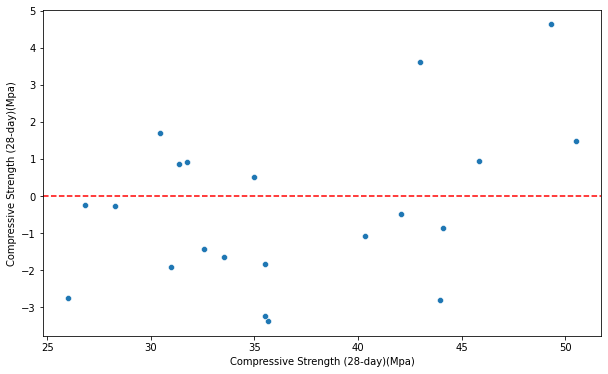

In [40]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()

<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)', ylabel='Density'>

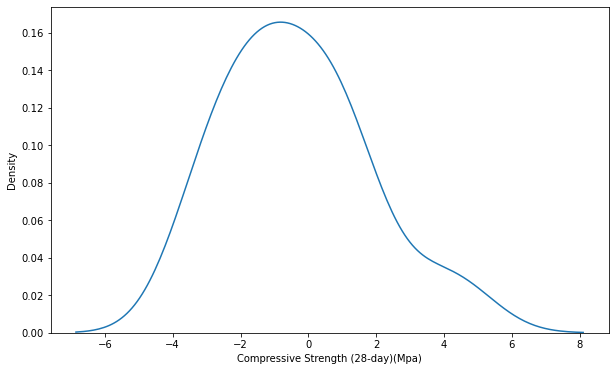

In [41]:
sns.kdeplot(residuals)

In [46]:
from scipy.stats import skew
skew(residuals)

0.6026499074920292

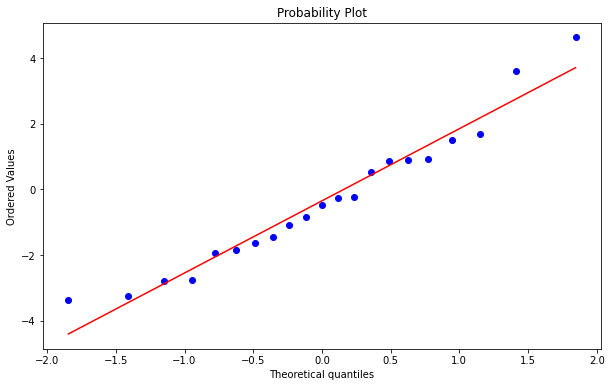

In [47]:
stats.probplot(residuals, dist= "norm", plot = plt);

## Polinomial Degree = 3

In [48]:
from sklearn.preprocessing import PolynomialFeatures
polinomial_converter = PolynomialFeatures(degree = 3, include_bias= False)
poly_features = polinomial_converter.fit_transform(X)

In [50]:
poly_features.shape

(103, 219)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state= 42)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X_train)
X_train

array([[1.4800000e+02, 1.0900000e+02, 1.3900000e+02, ..., 3.2715625e+04,
        7.9895000e+04, 1.9511200e+05],
       [2.9710000e+02, 4.0900000e+01, 2.3990000e+02, ..., 5.0668750e+04,
        1.2344750e+05, 3.0076300e+05],
       [1.5900000e+02, 1.9300000e+02, 0.0000000e+00, ..., 2.6450000e+04,
        5.7500000e+04, 1.2500000e+05],
       ...,
       [3.0380000e+02, 2.0000000e-01, 2.3980000e+02, ..., 4.8750000e+04,
        1.5210000e+05, 4.7455200e+05],
       [3.4200000e+02, 1.3600000e+02, 0.0000000e+00, ..., 2.6901000e+04,
        7.8141000e+04, 2.2698100e+05],
       [3.4870000e+02, 1.0000000e-01, 2.2310000e+02, ..., 6.5598000e+04,
        1.7643600e+05, 4.7455200e+05]])

In [56]:
X_train = scaler.transform(X_train)
X_train

array([[-1.01867817,  0.48906039, -0.07010854, ...,  0.51999368,
         0.39027674,  0.23761152],
       [ 0.85211371, -0.62611465,  1.06779252, ...,  1.56859671,
         1.33579654,  1.07054829],
       [-0.88065865,  1.86460669, -1.63768284, ...,  0.15403213,
        -0.09591616, -0.31514107],
       ...,
       [ 0.93618014, -1.29259959,  1.06666477, ...,  1.45652669,
         1.95783905,  2.44067492],
       [ 1.4154843 ,  0.93120027, -1.63768284, ...,  0.18037406,
         0.3521976 ,  0.48886197],
       [ 1.49955073, -1.29423714,  0.8783303 , ...,  2.44058177,
         2.48617083,  2.44067492]])

In [57]:
X_test = scaler.transform(X_test)

In [58]:
X_test

array([[ 1.15199248e+00, -1.29587470e+00,  2.11829285e-01, ...,
         6.27719613e-01,  5.31499545e-01,  4.02289402e-01],
       [-7.92828047e-01, -1.29587470e+00,  1.29447053e+00, ...,
         6.90956491e-05, -1.48080237e-02, -5.91997171e-02],
       [ 8.75953441e-01,  4.56309284e-01, -1.63768284e+00, ...,
         9.08953304e-01,  8.09928832e-01,  6.70710887e-01],
       ...,
       [-9.18300340e-01, -1.29587470e+00,  1.10275281e+00, ...,
         7.73426519e-02,  1.37009208e-01,  1.59411595e-01],
       [ 9.38689587e-01, -1.29587470e+00, -5.88310258e-02, ...,
        -3.15508398e-01, -2.71353746e-01, -2.54821719e-01],
       [-1.11654656e+00, -5.62250003e-01,  1.01140495e+00, ...,
         3.02570537e-01,  6.19554191e-02, -1.59804558e-01]])

In [61]:
pd.DataFrame(X_train).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
mean  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

      14   15   16   17   18   19   20   21   22   23   24   25   26   27   \
mean -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

      28   29   30   31   32   33   34   35   36   37   38   39   40   41   \
mean  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

      42   43   44   45   46   47   48   49   ...  169  170  171  172  173  \
mean  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0  ...  0.0 -0.0 -0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0   

      174  175  176  177  178  179  180  181  182  183  184  185  186  187  \
mean -0.0  0.0  0.0  0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

      188  189  190  191  192  193  194  195  196  197  198  199  200  201  \
mean -0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

      202  203  204  205  206  207  208  209  210  211  212  213  214  215  \
mean -0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

      216  217  218  
mean -0.0 -0.0 -0.0  
std   1.0  1.0  1.0  

[2 rows x 219 columns]

In [62]:
lm = LinearRegression()

In [63]:
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = lm.predict(X_test)

In [65]:
y_pred

array([45.39623168, 40.57706006, 28.85335758, 42.11849698, 34.40637156,
       41.0480873 , 35.43097782, 30.95319842, 26.6677173 , 35.07638966,
       49.56578639, 45.35560569, 44.01685142, 30.46091886, 31.40712041,
       26.71164887, 30.22343149, 35.79996108, 31.62948431, 41.81672262,
       49.48380202, 39.06600876, 23.29677321, 50.44625805, 30.93697958,
       49.76753677, 34.92288044, 41.2714256 , 34.16831294, 39.66202225,
       33.49596494])

In [66]:
y_train_pred = lm.predict(X_train)
y_train_pred

array([28.03, 49.17, 19.19, 41.27, 37.39, 25.21, 30.83, 35.39, 43.54,
       28.29, 32.84, 34.45, 36.59, 27.62, 29.77, 39.4 , 29.23, 36.32,
       33.38, 34.18, 52.65, 33.91, 36.72, 42.08, 41.01, 34.99, 32.71,
       26.42, 38.86, 37.66, 33.11, 38.19, 31.5 , 41.01, 45.42, 45.69,
       31.9 , 37.39, 44.08, 39.93, 50.23, 26.28, 33.51, 26.42, 58.53,
       37.92, 29.63, 28.7 , 52.65, 39.13, 29.5 , 30.43, 41.81, 18.26,
       41.14, 41.14, 36.46, 36.19, 41.81, 17.19, 38.46, 41.54, 27.89,
       27.09, 36.19, 29.77, 32.71, 28.16, 32.44, 44.48, 32.04, 48.7 ])

In [68]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 1.0
MAE 		: 2.5510457943609152e-14
MSE 		: 1.1392904495625235e-27
RMSE 		: 3.375337686161969e-14


In [69]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9545119859541589
MAE 		: 0.9001167836267172
MSE 		: 2.5635762531715267
RMSE 		: 1.601117189081276


In [70]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

lm_train   lm_test
rmse  3.375338e-14  1.601117
mae   2.551046e-14  0.900117
mse   1.139290e-27  2.563576
R2    1.000000e+00  0.954512

In [71]:
## MultiColineraty

In [72]:
def color_red(val):
    if val > 0.9 and val < 0.99:
        color = "red"
    else:
        color = "black"
    return f"color: {color}"

# 90 and +90 are muticolineraty

In [74]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

## Cross Validate

In [75]:
from sklearn.model_selection import cross_validate, cross_val_score

In [76]:
model = LinearRegression()

In [77]:
scores = cross_validate(model, X_train, y_train, scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", \
                                                           "neg_root_mean_squared_error"], cv = 10)

In [78]:
pd.DataFrame(scores, index = range(1, 11))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1   0.003003    0.000000  0.973501                     -1.111904   
2   0.001001    0.001001  0.749277                     -1.987419   
3   0.002002    0.001001  0.896083                     -1.222166   
4   0.001001    0.001000  0.965849                     -0.591124   
5   0.001001    0.001000  0.960288                     -0.799968   
6   0.001001    0.001001  0.968593                     -1.140753   
7   0.001001    0.001000  0.979615                     -1.048015   
8   0.001001    0.001001  0.981360                     -0.780299   
9   0.001001    0.001001  0.919991                     -1.699538   
10  0.001001    0.001000  0.874252                     -1.709244   

    test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                     -2.102966                         -1.450161  
2                     -6.882289                         -2.623412  
3                     -4.980138                         -2.231622  
4                     -0.859592                         -0.927142  
5                     -1.285341                         -1.133729  
6                     -2.121065                         -1.456388  
7                     -2.480398                         -1.574928  
8                     -1.135491                         -1.065594  
9                     -5.731337                         -2.394021  
10                    -6.659278                         -2.580558

In [79]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                             0.926881
test_neg_mean_absolute_error       -1.209043
test_neg_mean_squared_error        -3.423790
test_neg_root_mean_squared_error   -1.743755
dtype: float64

In [80]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9545119859541589
MAE 		: 0.9001167836267172
MSE 		: 2.5635762531715267
RMSE 		: 1.601117189081276


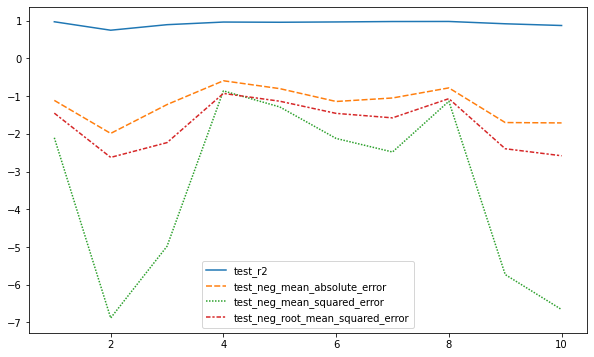

In [81]:
sns.lineplot(data = scores.iloc[:, 2:]);

In [82]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

lm_coef
0    0.954506
1   -0.215535
2    0.502743
3   -1.930871
4   -0.045751
..        ...
214  0.626825
215  0.934988
216 -0.038671
217 -0.157512
218 -0.786497

[219 rows x 1 columns]

## Ridge Regression

In [84]:
from sklearn.linear_model import RidgeCV

In [85]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [86]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring= "neg_root_mean_squared_error")

In [87]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [88]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [89]:
ridge_cv_model.alpha_

0.02

In [90]:
y_pred = ridge_cv_model.predict(X_test)

In [91]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.966714391940328
MAE 		: 0.8463161446369295
MSE 		: 1.8758830470848238
RMSE 		: 1.3696287990126463


In [92]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9997503283376646
MAE 		: 0.0915793550670564
MSE 		: 0.015595215075518643
RMSE 		: 0.1248808034708243


In [93]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

ridge_cv_train  ridge_cv_test
rmse        0.124881       1.369629
mae         0.091579       0.846316
mse         0.015595       1.875883
R2          0.999750       0.966714

In [95]:
pd.concat([ls, rcs], axis = 1)

lm_train   lm_test  ridge_cv_train  ridge_cv_test
rmse  3.375338e-14  1.601117        0.124881       1.369629
mae   2.551046e-14  0.900117        0.091579       0.846316
mse   1.139290e-27  2.563576        0.015595       1.875883
R2    1.000000e+00  0.954512        0.999750       0.966714

In [96]:
ridge_cv_model.coef_

array([ 9.50403318e-01,  9.86275057e-02,  3.56371268e-01, -1.52483804e+00,
       -3.38457081e-02, -4.74338625e-02,  6.77664431e-01, -1.94210279e-01,
        2.40610782e-02,  7.50099820e-01, -9.33497961e-02,  1.49216294e+00,
       -1.17632724e+00,  8.38176228e-01,  1.50533895e+00,  7.50242145e-01,
        3.09012102e-01,  1.43861905e-01, -1.55961018e-01, -9.54315995e-02,
       -3.76482854e-01,  7.91927144e-02,  5.16847675e-02,  9.47380290e-01,
       -2.03991158e-01, -2.36365302e-01, -5.36196439e-02, -1.68171879e+00,
        1.93653857e-01,  2.15040070e-01,  1.97804901e+00,  3.97649754e-01,
        1.94204602e-01,  2.71587293e+00, -8.94619418e-01, -2.83179712e+00,
       -1.44565915e+00, -1.46359132e+00,  7.44895162e-01,  2.05466570e-01,
       -1.26716986e-01,  3.42950044e-02,  1.29081554e-01,  2.95166554e-01,
       -5.00159170e-01,  2.62767606e+00,  1.39396303e-01, -1.06945115e-01,
       -1.11712949e+00,  8.09664025e-02, -4.42805074e-01,  2.83654608e-01,
        7.18200467e-03,  

In [97]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns= ["Ridge_CV_Coef"])

In [100]:
pd.concat([lm_df, rcm_df, rcm_df], axis = 1)

lm_coef  Ridge_CV_Coef  Ridge_CV_Coef
0    0.954506       0.950403       0.950403
1   -0.215535       0.098628       0.098628
2    0.502743       0.356371       0.356371
3   -1.930871      -1.524838      -1.524838
4   -0.045751      -0.033846      -0.033846
..        ...            ...            ...
214  0.626825       0.193532       0.193532
215  0.934988       0.643068       0.643068
216 -0.038671      -0.012357      -0.012357
217 -0.157512      -0.303086      -0.303086
218 -0.786497      -0.340825      -0.340825

[219 rows x 3 columns]

## Elastic Net

In [121]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

In [103]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio= [0.1, 0.5, 0.7, 0.9, 0.95, 1], cv = 10, max_iter= 100000)

In [104]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [105]:
elastic_cv_model.alpha_

0.01

In [107]:
elastic_cv_model.l1_ratio_

1.0

In [108]:
elastic_cv_model.coef_

array([ 0.        ,  0.        ,  0.        , -8.54850629, -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -1.69961503, -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        1.32101127,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  2.90009647, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.02676809,
       -0.        ,  2.92861145,  0.        ,  0.        , -0.07

In [109]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns= ["elastic_coef_"])

In [111]:
pd.concat([lm_df, rcm_df, rcm_df, ecm_df], axis = 1)

lm_coef  Ridge_CV_Coef  Ridge_CV_Coef  elastic_coef_
0    0.954506       0.950403       0.950403       0.000000
1   -0.215535       0.098628       0.098628       0.000000
2    0.502743       0.356371       0.356371       0.000000
3   -1.930871      -1.524838      -1.524838      -8.548506
4   -0.045751      -0.033846      -0.033846      -0.000000
..        ...            ...            ...            ...
214  0.626825       0.193532       0.193532       0.000000
215  0.934988       0.643068       0.643068       0.000000
216 -0.038671      -0.012357      -0.012357       0.000000
217 -0.157512      -0.303086      -0.303086       0.000000
218 -0.786497      -0.340825      -0.340825       0.000000

[219 rows x 4 columns]

In [112]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9938410232579729
MAE 		: 0.5194623503850823
MSE 		: 0.3847075236276231
RMSE 		: 0.620247953344163


In [114]:
y_pred = elastic_cv_model.predict(X_test)
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9671043046299022
MAE 		: 1.028171091659701
MSE 		: 1.853908666959214
RMSE 		: 1.361583147280846


In [115]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

elastic_cv_train  elastic_cv_test
rmse          0.620248         1.361583
mae           0.519462         1.028171
mse           0.384708         1.853909
R2            0.993841         0.967104

In [118]:
pd.concat([ls, rcs, ecs], axis = 1)

lm_train   lm_test  ridge_cv_train  ridge_cv_test  elastic_cv_train  \
rmse  3.375338e-14  1.601117        0.124881       1.369629          0.620248   
mae   2.551046e-14  0.900117        0.091579       0.846316          0.519462   
mse   1.139290e-27  2.563576        0.015595       1.875883          0.384708   
R2    1.000000e+00  0.954512        0.999750       0.966714          0.993841   

      elastic_cv_test  
rmse         1.361583  
mae          1.028171  
mse          1.853909  
R2           0.967104

## Grid Search

In [119]:
from sklearn.model_selection import GridSearchCV

In [122]:
elastic_model = ElasticNet(max_iter = 10000)

In [123]:
param_grid = {"alpha" : [0.001, 0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
             "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 0.05, 0.99, 1]}

In [124]:
grid_model = GridSearchCV(estimator= elastic_model, param_grid= param_grid, scoring= "neg_root_mean_squared_error", cv = 10, verbose = 2)

In [125]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.05, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [126]:
grid_model.best_params_

{'alpha': 0.001, 'l1_ratio': 1}

In [127]:
y_pred = grid_model.predict(X_test)

In [128]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9673360193256081
MAE 		: 0.8345068295570622
MSE 		: 1.8408498798505089
RMSE 		: 1.3567792303283939


In [129]:
y_train_pred = grid_model.predict(X_train)

In [130]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9993635645921907
MAE 		: 0.1546401063170719
MSE 		: 0.03975359868085182
RMSE 		: 0.19938304511881602
